# Text parsing based on imgae

C: 2025.02.14 <br>
M: 2025.02.14


Copyright (c) Marek Kocinski 2025 for CanEat.no

Our task is to parse a text based on photo of an product.

Alogrihm is a modification and extation of an alogirhm in the folder ``0.algorihtm-sketch``

#### Library imports

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode
from pathlib import Path

### Definition of the main function 

In [25]:
def display_images_grid(images, filenames, num_cols):
    """
    Wyświetla obrazki w siatce o zadanej liczbie kolumn.
    
    Args:
        images: lista obrazów (numpy arrays)
        filenames: lista nazw plików
        num_cols: liczba kolumn w siatce
    """
    # Oblicz liczbę wierszy
    num_images = len(images)
    num_rows = int(np.ceil(num_images / num_cols))
    
    # Utwórz figurę z podwykresami
    fig = plt.figure(figsize=(15, 3*num_rows))
    
    # Wyświetl każdy obrazek
    for idx, (img, fname) in enumerate(zip(images, filenames)):
        # Dodaj podwykres
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        
        # Wyświetl obrazek
        if len(img.shape) == 2:  # jeśli obraz jest czarno-biały
            plt.imshow(img, cmap='gray')
        else:  # jeśli obraz jest kolorowy
            plt.imshow(img)
            
        # Wyłącz osie
        plt.axis('off')
        
        # Dodaj tytuł (nazwę pliku)
        plt.title(fname, fontsize=8, pad=3)
    
    # Dostosuj odstępy między podwykresami
    plt.tight_layout()
    
    # Wyświetl siatkę
    plt.show()

In [26]:
def last_modification():
    from IPython.display import display, HTML
    from datetime import datetime
    
    # Aktualna data i czas
    current_time = datetime.now().strftime(" %Y-%m-%d &nbsp;&nbsp;&nbsp; %H:%M:%S")
    display(HTML(f'<div style="text-align: right"><i>Last modification: &nbsp;&nbsp;&nbsp; {current_time}</i></div>'))

#### Set global variables

In [27]:
CURRENT_DIR = Path.cwd()
IMGS_PTH = CURRENT_DIR.parent / 'produkty'
print(f"Current dir:\t{CURRENT_DIR}")
print(f"Images folder:\t{IMGS_PTH}")

Current dir:	/home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/can-eat/2.text-parsing
Images folder:	/home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/can-eat/produkty




#### List all product images in the folder

In [28]:
all_file_pths = list(IMGS_PTH.glob("*.*"))
all_file_names = [str(f.name.lower()) for f in all_file_pths]
print(f"All files: {len(all_file_names)}")

exts = [".json", ".jpeg", ".jpg", ".png", ".txt"]
for e in exts:
    print(f'\t-{e}: {len([f for f in all_file_names if f.endswith(e)])}') 

All files: 63
	-.json: 1
	-.jpeg: 18
	-.jpg: 42
	-.png: 1
	-.txt: 0


In [29]:
a = all_file_pths[0]
str(a)

'/home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/can-eat/produkty/IMG_1101.JPG'

In [35]:
ing_imags_pths = [f for f in all_file_pths  if "ingridients" in str(f)]
ing_imags_names = [f.name for f in ing_imags_pths]
ing_npy = [plt.imread(f) for f in ing_imags_pths]

#### Display images without recognized barcode (Failures)

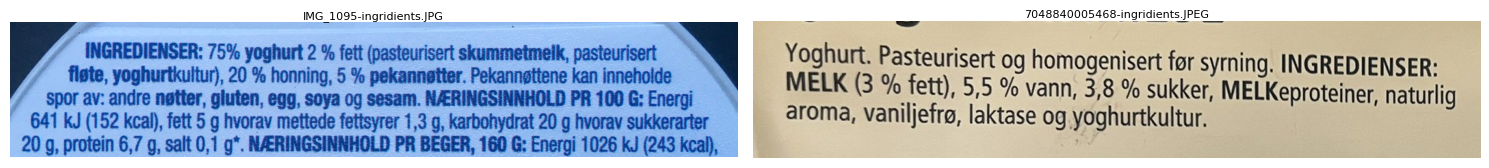

In [37]:
display_images_grid(ing_npy, ing_imags_names, 2)

In [39]:
from imageprocessor import ProductImageProcessor

In [40]:
processor = ProductImageProcessor()

In [61]:
for pth in ing_imags_pths:
    print()
    print(pth)
    print()
    image_path = pth
    # Preprocessuj obraz
    processed_image = processor.preprocess_image(image_path)
    # Wyodrębnij tekst
    text_list = processor.extract_text(processed_image)
    for i in text_list:
        print(i)
    print(40*'*')


/home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/can-eat/produkty/IMG_1095-ingridients.JPG

MIGREDIENSERE7596/oghuit 29 fett (pasteuriserglarnenuel Feseurisert
{ptesyoghunkúłun) 2o %honning  59rokennon@gelnnigeneKaninnenolde
sporavsandrenørengluten egg sojaogsrsaniałigsnnio4dPR7û0G Energi
'641 k (i52kćãł;fett Sgihuoiauneledeft;c
gšlbðLïù.Lt?ù
łfðãvśukk/rãZëî
20
protein 6,7 9;calt0
69
WRiGsWHOÉD2RBEGER;GDGSEñergi;026kl2 3Kca))
****************************************

/home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/can-eat/produkty/7048840005468-ingridients.JPEG

Yoghurt Pasteurisert og homogenisert far syrningHINGREDIENSER:
MELKG%tett) 559
vann; 3,8%sukker;
{MEIRëproteiner naturligi
aromanvaniljefrø
läktäseog
yoghurtkultur
****************************************


In [54]:
text_list

['Yoghurt Pasteurisert og homogenisert far syrningHINGREDIENSER:',
 'MELKG%tett) 559',
 'vann; 3,8%sukker;',
 '{MEIRëproteiner naturligi',
 'aromanvaniljefrø',
 'läktäseog',
 'yoghurtkultur']

In [38]:
last_modification()